In [ ]:
from collections import defaultdict
import numpy as np
import pandas as pd
import math
import random
from collections import deque
import pickle
import matplotlib.pyplot as plt 

In [ ]:
#@title Graph
class Graph():
  def __init__(self):
    self.graph = defaultdict(list)
    self.size = 50

  def addEdge(self,u,v): #creates adjacency list for the graph
    self.graph[u].append(v)
    self.graph[v].append(u)
    if u==1:
      self.graph[u].append(self.size)
    if v== self.size:
      self.graph[v].append(1)
    
  def valid_node_convert(self, i): #converts node in the range 1,50
    if i>self.size: 
      i=i%self.size
    if i<0:
      i=(self.size)+i
    if i==0:
      i=self.size
    return i

  def check_edge(self, random_node1): #checks whether any more edgses can be formed in the graph
    counter=0
    for i in range(random_node1-5, random_node1+6):
      adj_1=self.valid_node_convert(random_node1-1)
      adj_2=self.valid_node_convert(random_node1+1)
      i=self.valid_node_convert(i)
      if i!=random_node1 and i!=adj_1 and i!=adj_2 and len(g.graph[i])==3:
        counter+=1
    if counter==8:
      return False #No more edges can be formed
    else:
      return True

  def increaseEdge(self): #to add edges in the graph
    #probabilistic increasing edges
    edge_exists=True
    counter=0
    while(edge_exists):
      degree1=3
      flag=True
      while degree1>=3 and flag: #check if degree of the node picked is less then 3
        random_node1=random.randint(1,self.size)
        degree1=len(self.graph[random_node1])
        edge_exists=self.check_edge(random_node1)
        if edge_exists:
          if degree1>=3:
            continue
          val1=random_node1-5
          val2=random_node1+5
          degree2=3
          while degree2>=3: #check if degree of 2nd node picked is less then 3
            random_node2=random.randint(val1,val2+1)
            random_node2=self.valid_node_convert(random_node2)
            while random_node2==random_node1: #node 1 and node 2 shoud not be the same nodes
              random_node2=random.randint(val1,val2+1)
              random_node2=self.valid_node_convert(random_node2)
            degree2=len(self.graph[random_node2])
            if degree2>=3: #if degree of node2 is greater then 3, re-choose the node2
              continue
            else:
              break  
          flag=False
        else: #no edges can be formed
          break
      if edge_exists: # add the edges in the adjacency list
        if random_node1-1!=random_node2 and (random_node1+1)%self.size!=random_node2:
          g.graph[random_node1].append(random_node2)
          g.graph[random_node2].append(random_node1)
          counter+=1
    # return counter
g = Graph()
for i in range(1, g.size):
    g.addEdge(i,i+1)
g.increaseEdge()
print(g.graph)

defaultdict(<class 'list'>, {1: [2, 50], 2: [1, 3, 7], 3: [2, 4, 9], 4: [3, 5, 50], 5: [4, 6], 6: [5, 7, 11], 7: [6, 8, 2], 8: [7, 9, 14], 9: [8, 10, 3], 10: [9, 11], 11: [10, 12, 6], 12: [11, 13, 16], 13: [12, 14], 14: [13, 15, 8], 15: [14, 16], 16: [15, 17, 12], 17: [16, 18], 18: [17, 19], 19: [18, 20], 20: [19, 21], 21: [20, 22, 26], 22: [21, 23], 23: [22, 24], 24: [23, 25], 25: [24, 26], 26: [25, 27, 21], 27: [26, 28], 28: [27, 29], 29: [28, 30], 30: [29, 31], 31: [30, 32, 35], 32: [31, 33], 33: [32, 34], 34: [33, 35, 36], 35: [34, 36, 31], 36: [35, 37, 34], 37: [36, 38, 39], 38: [37, 39], 39: [38, 40, 37], 40: [39, 41, 45], 41: [40, 42, 47], 42: [41, 43, 46], 43: [42, 44, 48], 44: [43, 45, 49], 45: [44, 46, 40], 46: [45, 47, 42], 47: [46, 48, 41], 48: [47, 49, 43], 49: [48, 50, 44], 50: [49, 1, 4]})


In [ ]:
#@title Common functions
class common_functions():
  
  def shortest_paths(self):
    shortest_path={}
    for node1 in range(1,len(g.graph)+1):
      for node2 in range(1,len(g.graph)+1):
        shortest_path[(node1,node2)]= self.bfs(node1,node2)
    return shortest_path

  def bfs(self, node, end): #find the shortest path between two nodes using BFS
      path=[]
      queue = deque()
      queue.append(node)
      parent = {}
      visited= set()
      while len(queue) > 0:
        current = queue.popleft()
        visited.add(current)
        if current == end:
          path = self.backtrace(parent, node, current) #finding the path by backtracking
          return path
        #find adj nodes
        adj_nodes= g.graph[current].copy()
        for adj_node in adj_nodes:
          if adj_node not in visited:
            queue.append(adj_node)
            visited.add(adj_node)
            parent[adj_node] = current
      return []

  def backtrace(self, parent, start, end): #finding path by backtracking
    path = [end]
    while path[-1] != start:
      path.append(parent[path[-1]])
    path.reverse()
    return path
  
  def findShortestPaths(self, node1, node2):
    self.bfs_label(node1, node2)
    paths = self.dfs2(node1, node2)
    all = list(paths)
    predator_movements = []
    # for path in all:
    #   if path[1] not in predator_movements:
    #     predator_movements.append(path[1])
    # return predator_movements
    for path in all:
      if len(path)>=2 and path[1] not in predator_movements:
        predator_movements.append(path[1])
      elif len(path)==1:
        predator_movements.append(node2)
    return predator_movements
  
  def dfs2(self, node, end, path=None):
    if path is None:
        path = []
    path.append(node)
    if node == end:
        yield tuple(path)
    else:
        for neighbor in g.graph[node].copy():
            if neighbor in self.depth and self.depth[neighbor] == self.depth[node]+1:
                for sp in self.dfs2(neighbor, end, path):
                    yield sp
    path.pop()

  def bfs_label(self, start, end):
    self.depth = {start: 0}
    nodes = [start]
    while nodes:
      for node in nodes:
        if node == end:
            return self.depth
        for neighbor in g.graph[node].copy():
            if neighbor not in self.depth:
                self.depth[neighbor] = self.depth[node] + 1
                nodes.append(neighbor)
  
  def unique_pred_movements(self):
    movements={}
    for pred in range(1,len(g.graph)+1):
      for agent in range(1,len(g.graph)+1):
        movements[(pred,agent)]= com_func.findShortestPaths(pred,agent)
    return movements
  
  

com_func=common_functions()
movements=com_func.unique_pred_movements()

In [ ]:
cf = common_functions()
sp = cf.shortest_paths()
print(sp)

{(1, 1): [1], (1, 2): [1, 2], (1, 3): [1, 2, 3], (1, 4): [1, 2, 4], (1, 5): [1, 2, 4, 5], (1, 6): [1, 2, 4, 5, 6], (1, 7): [1, 2, 4, 5, 6, 7], (1, 8): [1, 2, 4, 5, 6, 7, 8], (1, 9): [1, 2, 4, 5, 6, 9], (1, 10): [1, 2, 4, 5, 6, 9, 10], (1, 11): [1, 2, 4, 5, 6, 7, 11], (1, 12): [1, 2, 4, 5, 6, 7, 11, 12], (1, 13): [1, 2, 4, 5, 6, 9, 10, 13], (1, 14): [1, 2, 4, 5, 6, 9, 10, 13, 14], (1, 15): [1, 2, 4, 5, 6, 9, 10, 13, 14, 15], (1, 16): [1, 2, 4, 5, 6, 7, 11, 12, 17, 16], (1, 17): [1, 2, 4, 5, 6, 7, 11, 12, 17], (1, 18): [1, 2, 4, 5, 6, 7, 11, 12, 17, 18], (1, 19): [1, 2, 4, 5, 6, 7, 11, 12, 17, 18, 19], (1, 20): [1, 2, 4, 5, 6, 7, 11, 12, 17, 18, 19, 20], (1, 21): [1, 2, 4, 5, 6, 7, 11, 12, 17, 18, 19, 20, 21], (1, 22): [1, 2, 4, 5, 6, 7, 11, 12, 17, 18, 19, 22], (1, 23): [1, 2, 4, 5, 6, 7, 11, 12, 17, 18, 19, 22, 23], (1, 24): [1, 45, 46, 41, 40, 37, 36, 35, 30, 29, 25, 24], (1, 25): [1, 45, 46, 41, 40, 37, 36, 35, 30, 29, 25], (1, 26): [1, 45, 46, 41, 40, 37, 36, 35, 30, 29, 25, 26], (1

In [ ]:
with open('paths.pickle', 'wb') as f:
  pickle.dump(sp, f)

In [ ]:
#@title Prey
class Prey():
  def __init__(self): #choose prey randomly from the nodes
    self.node = random.randrange(1, g.size+1)
  
  def move_prey(self): 
    #the prey choosing uniformly randomly from its neighbours/stay at current node
    adj_nodes=[]
    adj_nodes = g.graph[self.node].copy()
    adj_nodes.append(self.node) 
    self.node = adj_nodes[random.randrange(0, len(adj_nodes))]
prey=Prey()
print(prey.node)

49


In [ ]:
#@title Predator
class Predator():
  def __init__(self): #randomly chooses predator from nodes
    self.node = random.randrange(1, g.size+1)
  
  def move_predator(self, agent_pos):
    #the predator choosing uniformly randomly from its neighbours on the path to the agent
    path = com_func.bfs(self.node, agent_pos)
    if len(path)>=2:
      self.node = path[1]
    else:
      self.node=agent_pos
    

  def distracted_move_predator(self,agent_pos):
    #the predator choosing uniformly randomly from its neighbours on the path to the agent with 0.4 probability of being ditracted to its neighbours
    path = com_func.bfs(self.node, agent_pos)
    # print(self.node, agent_pos, path)
    if random.random()>0.4:
      if len(path)>1:
        self.node = path[1]
      else:
        self.node=agent_pos
    else:
      adj_nodes=g.graph[agent_pos].copy()
      self.node=adj_nodes[random.randint(0,len(adj_nodes)-1)]

predator=Predator()
print(predator.node)

10


In [ ]:
def u_initialise():
  ustar = {}
  for agent in range(1, len(g.graph) + 1): 
    for prey in range(1, len(g.graph) + 1):
      for predator in range(1, len(g.graph) + 1):
        if agent == prey and agent != predator:
          ustar[(agent, prey, predator)] = 0.0
        elif agent == predator or abs(agent - predator) == 1:
          ustar[(agent, prey, predator)] = 1000
        else:
          ustar[(agent, prey, predator)] = 1
  return ustar

In [ ]:
def bellman_update(ag, prey_neighbors, predator_neighbors, pd,state_ustar):
    future_utility = 0
    unique_pred_movements=movements[(pd,ag)]
    probability_prey= 1/(len(prey_neighbors))
    probability_sum=0
    for pr_neigh in prey_neighbors:
      for pd_neigh in predator_neighbors:
        if pd_neigh in unique_pred_movements:
          probability_pred=0.6/len(unique_pred_movements) + (0.4/len(predator_neighbors))
        else:
          probability_pred=0.4/len(predator_neighbors)
        probability = probability_prey*probability_pred
        if ag==pd:
          probability=1
        probability_sum+=probability
        future_utility += probability*(1 + state_ustar[(ag, pr_neigh, pd_neigh)])
    return future_utility

In [ ]:
def value_iteration():
  tolerence = 0.0001
  utility_previous=u_initialise()
  while True:
    utility_current = u_initialise()
    error_list = []
    for ag, pr, pd in utility_previous.keys():
      if ag == pr or ag == pd or abs(ag - pr) == 1 or abs(ag - pd) == 1:
        continue
      
      action_value = []
      for action in g.graph[ag]:
        prey_pos_list, predator_pos_list = [pr], []
        for neighbor in g.graph[pr]:
          prey_pos_list.append(neighbor)
        for neighbor in g.graph[pd]:
          predator_pos_list.append(neighbor)
        action_value.append(bellman_update(action, prey_pos_list, predator_pos_list, pd, utility_previous))  
      utility_current[(ag, pr, pd)] = min(action_value)

    max_error = 0
    for ag, pr, pd in utility_previous.keys():
      max_error = max(max_error, abs(utility_previous[(ag, pr, pd)] - utility_current[(ag, pr, pd)]))
    print('error', max_error)
    if max_error < tolerence:
      break
    utility_previous = utility_current
  return utility_current

utility_current=value_iteration()

error 733.6
error 635.92
error 469.8639999999999
error 316.1808
error 253.14463999999998
error 185.59057303703685
error 108.3299835100982
error 73.14915133102875
error 33.1534913806139
error 22.61421744813066
error 10.433165815260452
error 7.338643015976288
error 3.560459933358345
error 2.6992869734037868
error 1.4574424828366546
error 1.234227518841692
error 0.9880109087946529
error 0.9774256695251857
error 0.9668579516675635
error 0.9443442522920833
error 0.9261897762631577
error 0.9062267935330794
error 0.8761863481499539
error 0.84495125917433
error 0.7642442668091043
error 0.6807342531803542
error 0.5576938006893393
error 0.4858065468016193
error 0.3953624445363566
error 0.322072118623165
error 0.2581291074476084
error 0.19953902802607715
error 0.14845932625840774
error 0.12650462792959516
error 0.09566165999159892
error 0.08385168357782291
error 0.06820305766990131
error 0.06141117603809931
error 0.05511329489833017
error 0.04937211899695271
error 0.04421744295517982
error 0.0395

In [ ]:
maxi=-math.inf
for i in utility_current:
  if utility_current[i]>maxi and utility_current[i]<100:
    maxi=utility_current[i]
print("Minimal expected number of rounds to catch the prey for an optimal agent:", 19.3909479934958)

Minimal expected number of rounds to catch the prey for an optimal agent: 19.3909479934958


In [ ]:
with open('graph.pickle', 'rb') as f:
  graph= pickle.load(f)
edges = []
for k, v in graph.items():
  for e in v:
    edges.append((k,e))
nodes = list(graph.keys())
print(nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
color_map = []
for node in nodes:
  if node == 6:
    color_map.append('black')
  elif node == 15:
    color_map.append('green')
  elif node == 8:
    color_map.append('red')
  else: 
    color_map.append('blue')  

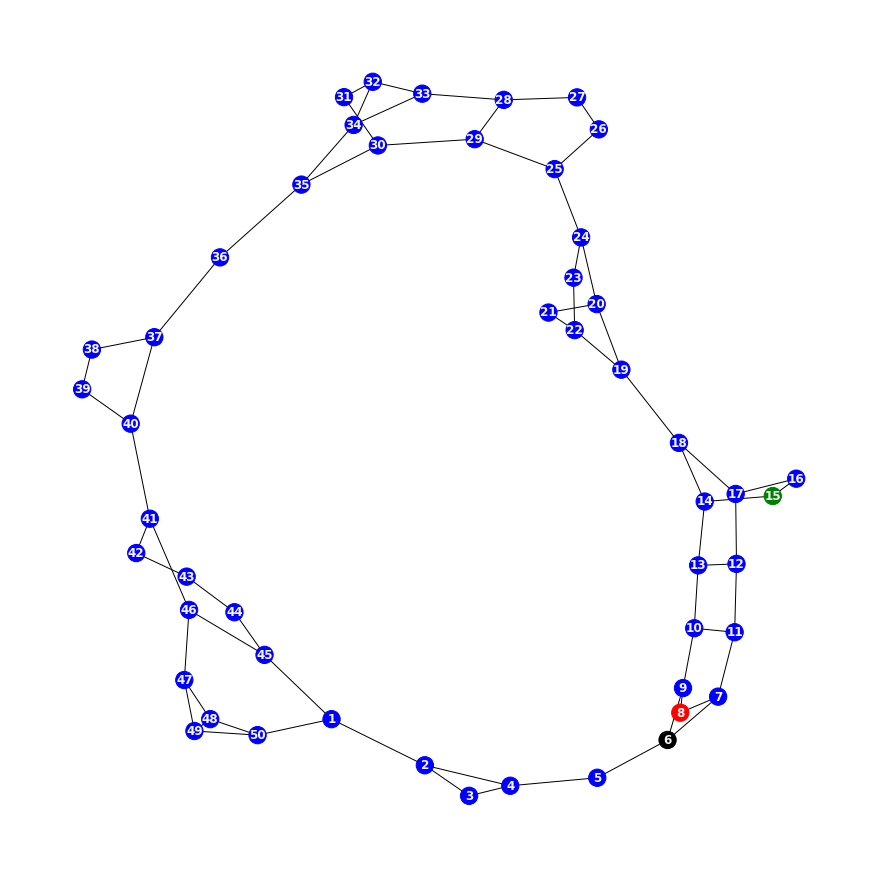

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, node_color=color_map, with_labels=True, font_color='whitesmoke',font_weight='bold')
plt.show()

In [ ]:
with open('utility.pickle', 'rb') as f:
  utility_current= pickle.load(f)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#@title U_star Agent
class u_star():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, utility_current,prey,pred): 
    best_node, min_utility = self.node, math.inf
    for action in g.graph[self.node]:
      if utility_current[(action, prey, pred)] < min_utility:
        min_utility = utility_current[(action, prey, pred)]
        best_node = action
    self.node = best_node

agent = u_star()  

In [ ]:
#@title Game Results for U_star
simulation_hung=0
win, lose =0,0
step=0
# utility_current=value_iteration()
for i in range(1,3001): #simulating 3000 times 
  agent = u_star()
  predator = Predator()
  prey = Prey()
  timestep=0
  while agent.node == prey.node and agent.node == predator.node: 
      agent = u_star()
      predator = Predator()
      prey = Prey()
  ini_agent=agent.node
  ini_prey=prey.node
  ini_predator=predator.node
  while agent.node!=prey.node and agent.node!=predator.node: #end when agent catches the prey or when predator catches the agent
    agent.move_agent(utility_current,prey.node,predator.node)
    predator.distracted_move_predator(agent.node)
    prey.move_prey()
    timestep+=1
    if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
      simulation_hung+=1
      break
  if agent.node==prey.node:
    win += 1
  else:
    lose += 1
print("Wins: ", win, "Losses: ", lose)
print("Number of times Simulation Hung", simulation_hung)
print("Average number of steps:", step)

Wins:  2994 Losses:  6
Number of times Simulation Hung 0
Average number of steps: 7.4


In [ ]:
with open('utility.pickle', 'wb') as f:
  pickle.dump(utility_current, f)

with open('graph.pickle', 'wb') as f:
  pickle.dump(g.graph, f)

In [ ]:
with open('pankti_graph.pickle', 'rb') as f:
  g.graph= pickle.load(f)
print('Graph', g.graph)

Graph defaultdict(<class 'list'>, {1: [2, 50, 45], 2: [1, 3, 4], 3: [2, 4], 4: [3, 5, 2], 5: [4, 6], 6: [5, 7, 9], 7: [6, 8, 11], 8: [7, 9], 9: [8, 10, 6], 10: [9, 11, 13], 11: [10, 12, 7], 12: [11, 13, 17], 13: [12, 14, 10], 14: [13, 15, 18], 15: [14, 16], 16: [15, 17], 17: [16, 18, 12], 18: [17, 19, 14], 19: [18, 20, 22], 20: [19, 21, 24], 21: [20, 22], 22: [21, 23, 19], 23: [22, 24], 24: [23, 25, 20], 25: [24, 26, 29], 26: [25, 27], 27: [26, 28], 28: [27, 29, 33], 29: [28, 30, 25], 30: [29, 31, 35], 31: [30, 32], 32: [31, 33, 34], 33: [32, 34, 28], 34: [33, 35, 32], 35: [34, 36, 30], 36: [35, 37], 37: [36, 38, 40], 38: [37, 39], 39: [38, 40], 40: [39, 41, 37], 41: [40, 42, 46], 42: [41, 43], 43: [42, 44], 44: [43, 45], 45: [44, 46, 1], 46: [45, 47, 41], 47: [46, 48, 49], 48: [47, 49, 50], 49: [48, 50, 47], 50: [49, 1, 48]})


Partial Utility

In [ ]:
#@title Calculating Bayesian Probabilities for the Prey
class BayesianPrey():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self, agent_pos): #belief state at start with no survey node
    for i in range(1, g.size+1):
      if i == agent_pos:
        self.belief_state[i] = 0
      else:
        self.belief_state[i] = round(1/(g.size-1),3) #P(node)=1/49
    self.belief_state_t = self.belief_state.copy()
  
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, preyPos):
    for i in range(1, g.size+1):
      prob = round(self.belief_state[i]/(len(g.graph[i])+1),3)
      for neighbour in g.graph[i]:
        prob += round(self.belief_state[neighbour]/(len(g.graph[neighbour])+1),3)
        self.belief_state_t[i] = round(prob,3)

  def conditionalFactoring(self,surveyNode, preyPos, prey_found, prey_found_count):
    if surveyNode == preyPos: #if prey found we update present belief state i.e., P(surveynode)=1
      prey_found_count+=1
      prey_found = True
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    else:
      if prey_found: #if prey found once and prey not at survey node, we update belief state 
        temp = self.belief_state[surveyNode]
        for i in range(1, g.size+1):
          if i == surveyNode:
            self.belief_state[i] = 0
          else:
            self.belief_state[i] = round(self.belief_state[i]/(1-temp),3) #propogate probsbilities of the surveynode to the other nodes
      else:
        for i in range(1, g.size+1): #if prey not found once and prey not at survey node, we update belief state at t
          if i == surveyNode:
            self.belief_state_t[i] = 0
          else:
            self.belief_state_t[i] = round(self.belief_state[i]/(1-self.belief_state[surveyNode]),3) #propogate probsbilities of the surveynode to the other nodes
    return prey_found, prey_found_count
    
bn_prey = BayesianPrey()

In [ ]:
def u_partial(agent, predator, belief_state,utility_current, u_partial_all):
  u_partial={}
  for s_agent in g.graph[agent]:
    for s_predator in g.graph[predator]:
      summation=0
      for s_prey, p_prey in belief_state.items():
        summation+=p_prey*utility_current[(s_agent, s_prey, s_predator)]
      u_partial[(s_agent,s_predator)]=summation
      u_partial_all[(s_agent,s_predator)].append(summation)
      u_partial_all[(s_agent,s_predator)].append(list(belief_state.values()))
  return u_partial

In [ ]:
#@title U_star_partial Agent
class u_star_partial():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, utility_current, prey, pred, prey_found, prey_found_count, u_partial_all): 
    bn_prey.belief_state_t[self.node], bn_prey.belief_state[self.node]=0, 0
    max_prey_pos = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())] #choosing the survey node with maximum probability
    prey_pos=random.choice(max_prey_pos)

    #updating the belief states   
    prey_found, prey_found_count=bn_prey.conditionalFactoring(prey_pos, prey, prey_found, prey_found_count)
    if prey_found:
      bn_prey.marginalization(prey_pos, prey)
    bn_prey.belief_state=bn_prey.belief_state_t.copy()

    u_partial_dict= u_partial(self.node, pred, bn_prey.belief_state,utility_current,u_partial_all)
    next_agent_pos, min_utility = self.node, math.inf
    for action in g.graph[self.node]:
      for predator in g.graph[pred]:
        if u_partial_dict[(action, predator)] < min_utility:
          min_utility = u_partial_dict[(action, predator)]
          next_agent_pos = action
    self.node = next_agent_pos
    return prey_found, prey_found_count

agent = u_star_partial()  

In [ ]:
#@title Game Results for U_star_partial
simulation_hung=0
win, lose =0,0
prey_found_count=0
step=0
u_partial_all=defaultdict(list)
# utility_current=value_iteration()
for i in range(1,3001): #simulating 3000 times 
  agent = u_star_partial()
  predator = Predator()
  prey = Prey()
  bn_prey.initialBeliefState(agent.node)
  timestep=0
  while agent.node == prey.node and agent.node == predator.node: 
      agent = u_star_partial()
      predator = Predator()
      prey = Prey()
  prey_found=False
  while agent.node!=prey.node and agent.node!=predator.node: #end when agent catches the prey or when predator catches the agent
    prey_found, prey_found_count=agent.move_agent(utility_current,prey.node,predator.node, prey_found, prey_found_count, u_partial_all)
    predator.distracted_move_predator(agent.node)
    prey.move_prey()
    timestep+=1
    if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
      simulation_hung+=1
      break
  prey_found_count=0
  if agent.node==prey.node:
    win += 1
  else:
    lose += 1
print("Wins: ", win, "Losses: ", lose)
print("Number of times Simulation Hung", simulation_hung)
print("Average number of steps:", step)

Wins:  2940 Losses:  60
Number of times Simulation Hung 0
Average number of steps: 13


In [ ]:
with open('Our Data/vstar.pickle', 'rb') as f:
  v_star_utilities= pickle.load(f)

In [ ]:
#@title V_star Agent
class v_star():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, v_star_utilities,prey,pred): 
    next_agent_pos, min_utility = self.node, math.inf
    for action in g.graph[self.node]:
      if v_star_utilities[(action, prey, pred)] < min_utility:
        min_utility = v_star_utilities[(action, prey, pred)]
        next_agent_pos = action
    self.node = next_agent_pos

agent = v_star()  

In [ ]:
#@title Game Results for V_star
simulation_hung=0
win, lose =0,0
step=0
# current=value_iteration()
for i in range(1,101): #simulating 100 times for each graph
  agent = v_star()
  predator = Predator()
  prey = Prey()
  timestep=0
  while agent.node == prey.node and agent.node == predator.node: 
      agent = v_star()
      predator = Predator()
      prey = Prey()
  ini_agent=agent.node
  ini_prey=prey.node
  ini_predator=predator.node
  while agent.node!=prey.node and agent.node!=predator.node: #end when agent catches the prey or when predator catches the agent
    agent.move_agent(v_star_utilities,prey.node,predator.node)
    predator.distracted_move_predator(agent.node)
    prey.move_prey()
    timestep+=1
    if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
      simulation_hung+=1
      break
  if agent.node==prey.node:
    win += 1
  else:
    lose += 1
print("Wins: ", win, "Losses: ", lose)
print("Number of times Simulation Hung", simulation_hung)
print("Average number of steps:", step)

Wins:  2946 Losses:  54
Number of times Simulation Hung 0
Average number of steps: 8.1


In [ ]:
with open('Our Data/vstar_partial.pickle', 'rb') as f:
  v_star_partial_utilities= pickle.load(f)

In [ ]:
#@title V_star_partial Agent
class v_star_partial():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, v_star_partial_utilities, prey, pred, prey_found, prey_found_count, u_partial_all): 
    bn_prey.belief_state_t[self.node], bn_prey.belief_state[self.node]=0, 0
    max_prey_pos = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())] #choosing the survey node with maximum probability
    prey_pos=random.choice(max_prey_pos)

    #updating the belief states   
    prey_found, prey_found_count=bn_prey.conditionalFactoring(prey_pos, prey, prey_found, prey_found_count)
    if prey_found:
      bn_prey.marginalization(prey_pos, prey)
    bn_prey.belief_state=bn_prey.belief_state_t.copy()

    u_partial_dict= u_partial(self.node, pred, bn_prey.belief_state,v_star_partial_utilities,u_partial_all)
    next_agent_pos, min_utility = self.node, math.inf
    for action in g.graph[self.node]:
      for predator in g.graph[pred]:
        if u_partial_dict[(action, predator)] < min_utility:
          min_utility = u_partial_dict[(action, predator)]
          next_agent_pos = action
    self.node = next_agent_pos
    return prey_found, prey_found_count

agent = v_star_partial()  

In [ ]:
#@title Game Results for V_star_partial
simulation_hung=0
win, lose =0,0
prey_found_count=0
step=0
v_partial_all=defaultdict(list)
# current=value_iteration()
for i in range(1,3000): #simulating 3000 times for each graph
  agent = v_star_partial()
  predator = Predator()
  prey = Prey()
  bn_prey.initialBeliefState(agent.node)
  timestep=0
  while agent.node == prey.node and agent.node == predator.node: 
      agent = v_star_partial()
      predator = Predator()
      prey = Prey()
  prey_found=False
  while agent.node!=prey.node and agent.node!=predator.node: #end when agent catches the prey or when predator catches the agent
    prey_found, prey_found_count=agent.move_agent(utility_current,prey.node,predator.node, prey_found, prey_found_count, v_partial_all)
    predator.distracted_move_predator(agent.node)
    prey.move_prey()
    timestep+=1
    if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
      simulation_hung+=1
      break
  prey_found_count=0
  if agent.node==prey.node:
    win += 1
  else:
    lose += 1
print("Wins: ", win, "Losses: ", lose)
print("Number of times Simulation Hung", simulation_hung)
print("Average number of steps:", step)

Wins:  2890 Losses:  110
Number of times Simulation Hung 0
Average number of steps: 13.13


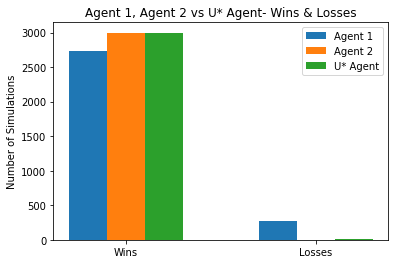

In [ ]:
#@title Comparison of U* Agent, Agent 1 and Agent 2 - Wins and Losses
X = ['Wins','Loses']
N = 2
ind = np.arange(N)
width = 0.20
agent1= [2730,270]
agent2 = [2997,3]
u_star=[2994, 6]
X_axis = np.arange(len(X))
plt.bar(ind, agent1, width, label = 'Agent 1')
plt.bar(ind+width, agent2, width, label = 'Agent 2')  
plt.bar(ind+width*2, u_star, width, label = 'U* Agent')
 
plt.xticks(ind+width, ['Wins','Losses'])
plt.ylabel("Number of Simulations")
plt.title("Agent 1, Agent 2 vs U* Agent- Wins & Losses")
plt.legend()
plt.show()

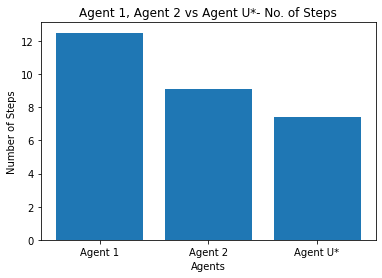

In [ ]:
#@title Comparison of Agent 1, Agent 2 and Agent U*- Number of Steps
data = [12.50, 9.13, 7.40]
labels = ['Agent 1', 'Agent 2', 'Agent U*']
plt.xticks(range(len(data)), labels)
plt.xlabel('Agents')
plt.ylabel('Number of Steps')
plt.title('Agent 1, Agent 2 vs Agent U*- No. of Steps')
plt.bar(range(len(data)), data) 
plt.show()

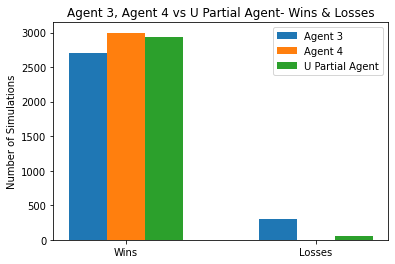

In [ ]:
#@title Comparison of Agent 3, Agent 4 and U Partial Agent - Wins and Losses
X = ['Wins','Loses']
N = 2
ind = np.arange(N)
width = 0.20
agent3= [2700,300]
agent4 = [2997,3]
u_partial=[2940, 60]
X_axis = np.arange(len(X))
plt.bar(ind, agent3, width, label = 'Agent 3')
plt.bar(ind+width, agent4, width, label = 'Agent 4')  
plt.bar(ind+width*2, u_partial, width, label = 'U Partial Agent')
 
plt.xticks(ind+width, ['Wins','Losses'])
plt.ylabel("Number of Simulations")
plt.title("Agent 3, Agent 4 vs U Partial Agent- Wins & Losses")
plt.legend()
plt.show()

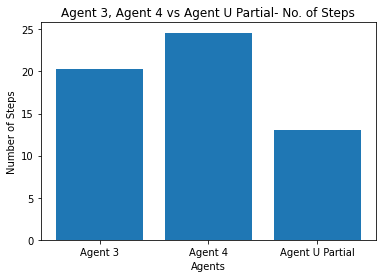

In [ ]:
#@title Comparison of Agent 3, Agent 4 and Agent U Partial- Number of Steps
data = [20.29,24.60, 13]
labels = ['Agent 3', 'Agent 4', 'Agent U Partial']
plt.xticks(range(len(data)), labels)
plt.xlabel('Agents')
plt.ylabel('Number of Steps')
plt.title('Agent 3, Agent 4 vs Agent U Partial- No. of Steps')
plt.bar(range(len(data)), data) 
plt.show()

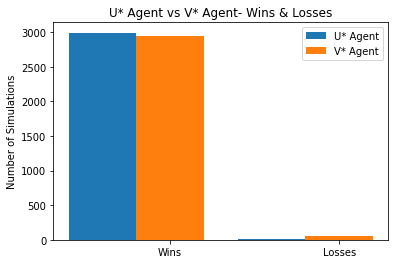

In [ ]:
#@title Comparison of U* Agent and V* Agent- Wins & Losses
X = ['Wins','Losses']
N = 2
ind = np.arange(N)
width = 0.40
u_partial= [2994,6]
v_partial = [2946,54]
X_axis = np.arange(len(X))
plt.bar(ind, u_partial, width, label = 'U* Agent')
plt.bar(ind+width, v_partial, width, label = 'V* Agent')  
 
plt.xticks(ind+width, ['Wins','Losses'])
plt.ylabel("Number of Simulations")
plt.title("U* Agent vs V* Agent- Wins & Losses")
plt.legend()
plt.show()

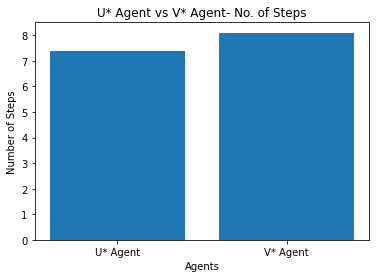

In [ ]:
#@title Comparison of U* Agent and V* Agent- Number of steps
data = [7.40,8.10]
labels = ['U* Agent', 'V* Agent']
plt.xticks(range(len(data)), labels)
plt.xlabel('Agents')
plt.ylabel('Number of Steps')
plt.title('U* Agent vs V* Agent- No. of Steps')
plt.bar(range(len(data)), data) 
plt.show()

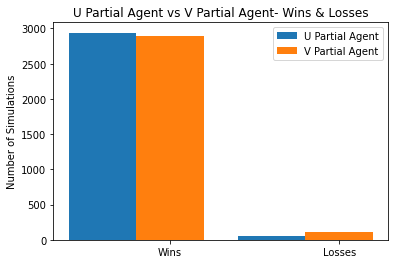

In [ ]:
#@title Comparison of U Partial Agent and V Partial Agent- Wins & Losses
X = ['Wins','Losses']
N = 2
ind = np.arange(N)
width = 0.40
u_partial= [2940,60]
v_partial = [2890,110]
X_axis = np.arange(len(X))
plt.bar(ind, u_partial, width, label = 'U Partial Agent')
plt.bar(ind+width, v_partial, width, label = 'V Partial Agent')  
 
plt.xticks(ind+width, ['Wins','Losses'])
plt.ylabel("Number of Simulations")
plt.title("U Partial Agent vs V Partial Agent- Wins & Losses")
plt.legend()
plt.show()

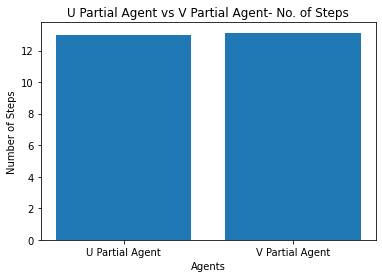

In [ ]:
#@title Comparison of U Partial Agent and V Partial Agent
data = [13,13.13]
labels = ['U Partial Agent', 'V Partial Agent']
plt.xticks(range(len(data)), labels)
plt.xlabel('Agents')
plt.ylabel('Number of Steps')
plt.title('U Partial Agent vs V Partial Agent- No. of Steps')
plt.bar(range(len(data)), data) 
plt.show()